In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score 
from sklearn import metrics
from sklearn.preprocessing import StandardScaler



from scipy import stats
from scipy.stats import skew
from scipy.stats import uniform
from scipy.stats import norm,skew

In [2]:
# Reading dataset and checking the head
df=pd.read_csv("D://train.csv")
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Data understanding preperation and EDA

In [3]:
df.info() # checking data type,number of columns etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [4]:
df.Id.value_counts() #checking Id column

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64

In [5]:
df.Id.describe()

count    1460.000000
mean      730.500000
std       421.610009
min         1.000000
25%       365.750000
50%       730.500000
75%      1095.250000
max      1460.000000
Name: Id, dtype: float64

In [6]:
df.drop("Id", axis=1, inplace=True) # Droping id column as it is not usefull for analysis

In [7]:
df.shape # checking the shape of data set

(1460, 80)

In [8]:
df.columns #checking to see all coumn names

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [9]:
df.describe() # Checking to see distribution of data, std deviation, mean etc

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
df.shape

(1460, 80)

In [11]:
df.isnull().sum() # Checking for null values

MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [12]:
df_num=df.select_dtypes(["int64","float64"]) # Seperating numerical variables to analyse
df_num.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

In [13]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [14]:
df.MSSubClass.value_counts()

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [15]:
df.OverallQual.value_counts()

5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

In [16]:
df.YearBuilt

0       2003
1       1976
2       2001
3       1915
4       2000
        ... 
1455    1999
1456    1978
1457    1941
1458    1950
1459    1965
Name: YearBuilt, Length: 1460, dtype: int64

In [17]:
df.BsmtHalfBath.value_counts()

0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

In [18]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 37 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   LotArea        1460 non-null   int64  
 3   OverallQual    1460 non-null   int64  
 4   OverallCond    1460 non-null   int64  
 5   YearBuilt      1460 non-null   int64  
 6   YearRemodAdd   1460 non-null   int64  
 7   MasVnrArea     1452 non-null   float64
 8   BsmtFinSF1     1460 non-null   int64  
 9   BsmtFinSF2     1460 non-null   int64  
 10  BsmtUnfSF      1460 non-null   int64  
 11  TotalBsmtSF    1460 non-null   int64  
 12  1stFlrSF       1460 non-null   int64  
 13  2ndFlrSF       1460 non-null   int64  
 14  LowQualFinSF   1460 non-null   int64  
 15  GrLivArea      1460 non-null   int64  
 16  BsmtFullBath   1460 non-null   int64  
 17  BsmtHalfBath   1460 non-null   int64  
 18  FullBath

In [19]:
# Removing few Columns from numeric data set as they are categorical as seen from data dictionary
df_num=df_num.drop(["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","BsmtFullBath","BsmtHalfBath","FullBath","HalfBath","BedroomAbvGr","KitchenAbvGr","TotRmsAbvGrd","Fireplaces", "GarageYrBlt", "GarageCars", "MoSold", "YrSold"],axis=1)

In [20]:
df_num.columns

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
       '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [21]:
df_num.isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [22]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [23]:
df_num.isna().any() 

LotFrontage       True
LotArea          False
MasVnrArea        True
BsmtFinSF1       False
BsmtFinSF2       False
BsmtUnfSF        False
TotalBsmtSF      False
1stFlrSF         False
2ndFlrSF         False
LowQualFinSF     False
GrLivArea        False
GarageArea       False
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
MiscVal          False
SalePrice        False
dtype: bool

In [24]:
df_num.shape

(1460, 20)

# Visualising the data

In [25]:
df_num.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.97,0.98,0.99]) 

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,SalePrice
count,1201.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,180921.195890
std,24.284752,9981.264932,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,79442.502883
min,21.000000,1300.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,34900.000000
25%,59.000000,7553.500000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,129975.000000
50%,69.000000,9478.500000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,163000.000000
75%,80.000000,11601.500000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,214000.000000
85%,90.000000,13161.100000,262.350000,929.450000,0.000000,1010.300000,1485.150000,1572.150000,870.150000,0.000000,1987.300000,672.000000,216.000000,105.000000,0.000000,0.000000,0.000000,0.000000,0.000000,250000.000000
95%,107.000000,17401.150000,456.000000,1274.000000,396.200000,1468.000000,1753.000000,1831.250000,1141.050000,0.000000,2466.100000,850.100000,335.000000,175.050000,180.150000,0.000000,160.000000,0.000000,0.000000,326100.000000
97%,120.000000,21571.800000,574.410000,1375.990000,546.230000,1589.380000,1905.460000,1981.610000,1245.530000,0.000000,2633.230000,884.000000,385.380000,213.230000,216.000000,0.000000,192.000000,0.000000,400.000000,374230.000000


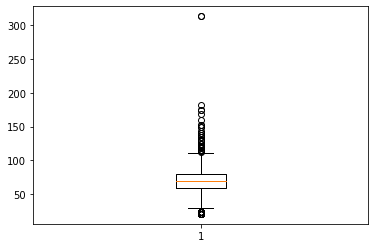

In [26]:
plt.boxplot(df[(df.LotFrontage>0)].LotFrontage)
plt.show()

In [27]:
df.LotFrontage.value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64

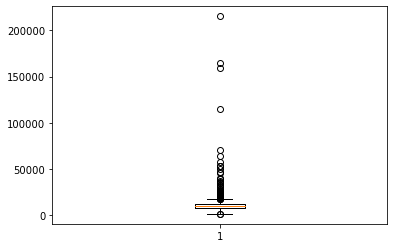

In [28]:
plt.boxplot(df.LotArea)
plt.show()

In [29]:
df.LotArea.value_counts()

7200     25
9600     24
6000     17
8400     14
9000     14
         ..
13031     1
10991     1
8944      1
6897      1
8190      1
Name: LotArea, Length: 1073, dtype: int64

<AxesSubplot:xlabel='LotArea', ylabel='Density'>

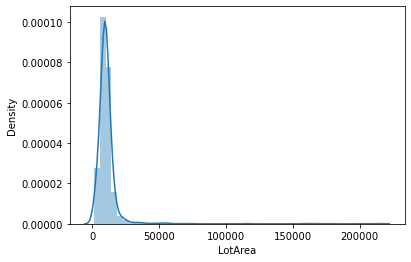

In [30]:
sns.distplot(df.LotArea)

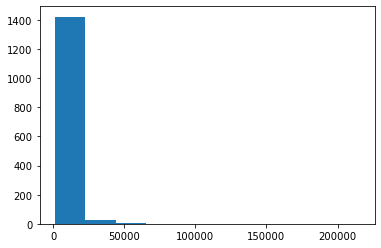

In [31]:
plt.hist(df.LotArea)
plt.show()

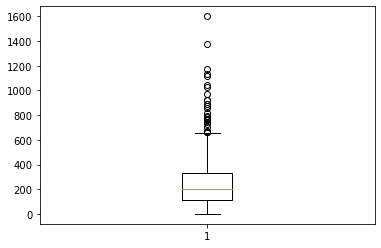

In [32]:
plt.boxplot(df[(df.MasVnrArea>0)].MasVnrArea)
plt.show()

In [33]:
df.MasVnrArea.value_counts()

0.0      861
108.0      8
72.0       8
180.0      8
16.0       7
        ... 
31.0       1
366.0      1
528.0      1
894.0      1
415.0      1
Name: MasVnrArea, Length: 327, dtype: int64

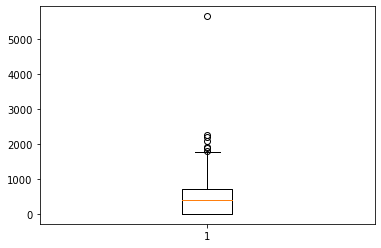

In [34]:
plt.boxplot(df.BsmtFinSF1)
plt.show()

In [35]:
df.BsmtFinSF1.value_counts()

0       467
24       12
16        9
20        5
686       5
       ... 
535       1
534       1
532       1
522       1
2096      1
Name: BsmtFinSF1, Length: 637, dtype: int64

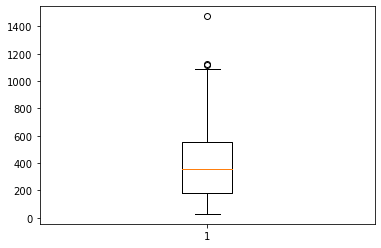

In [36]:
plt.boxplot(df[df.BsmtFinSF2>0].BsmtFinSF2)
plt.show()

In [37]:
df.BsmtFinSF2.value_counts()

0       1293
180        5
374        3
117        2
391        2
        ... 
215        1
211        1
210        1
208        1
1474       1
Name: BsmtFinSF2, Length: 144, dtype: int64

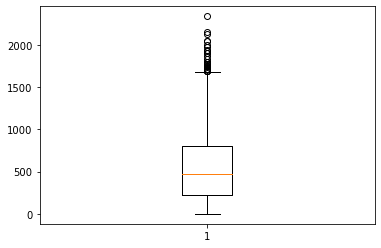

In [38]:
plt.boxplot(df.BsmtUnfSF)
plt.show()

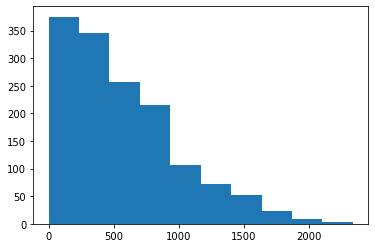

In [39]:
plt.hist(df.BsmtUnfSF)
plt.show()

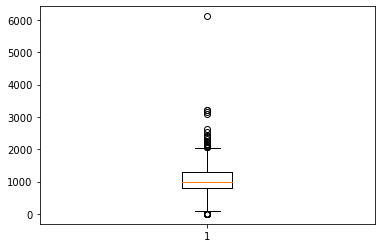

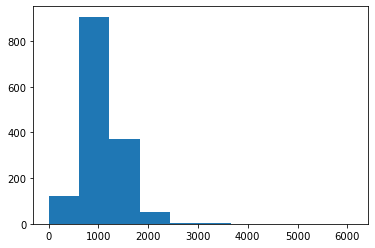

In [40]:
plt.boxplot(df.TotalBsmtSF)
plt.show()
plt.hist(df.TotalBsmtSF)
plt.show()

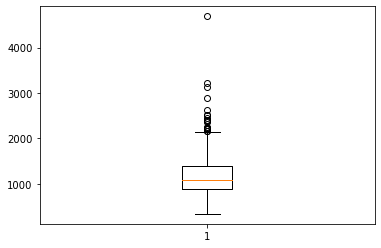

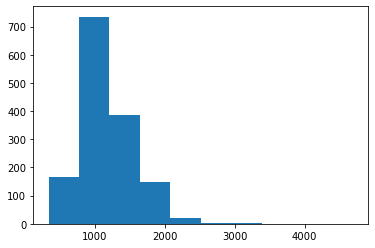

0        856
1       1262
2        920
3        961
4       1145
        ... 
1455     953
1456    2073
1457    1188
1458    1078
1459    1256
Name: 1stFlrSF, Length: 1460, dtype: int64

In [41]:
plt.boxplot(df["1stFlrSF"])
plt.show()
plt.hist(df["1stFlrSF"])
plt.show()
df["1stFlrSF"]

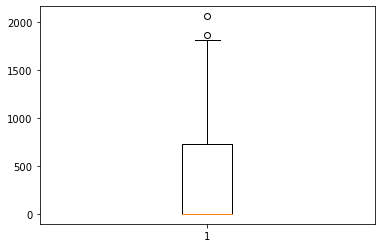

In [42]:
plt.boxplot(df["2ndFlrSF"])
plt.show()

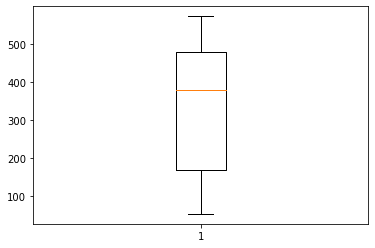

0      1434
80        3
360       2
392       1
528       1
515       1
514       1
513       1
481       1
479       1
473       1
420       1
397       1
390       1
53        1
384       1
371       1
234       1
232       1
205       1
156       1
144       1
120       1
572       1
Name: LowQualFinSF, dtype: int64

In [43]:
plt.boxplot(df[df.LowQualFinSF>0].LowQualFinSF)
plt.show()
df.LowQualFinSF.value_counts()

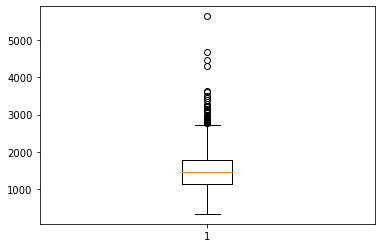

In [44]:
plt.boxplot(df.GrLivArea)
plt.show()

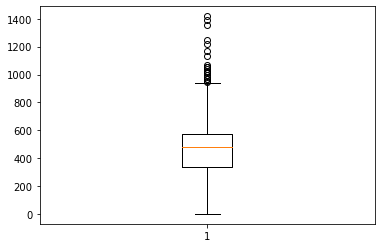

0       81
440     49
576     47
240     38
484     34
        ..
671      1
342      1
673      1
675      1
1418     1
Name: GarageArea, Length: 441, dtype: int64

In [45]:
plt.boxplot(df.GarageArea)
plt.show()
df.GarageArea.value_counts()

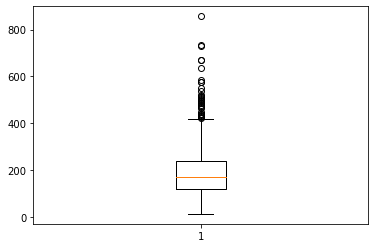

0      761
192     38
100     36
144     33
120     31
      ... 
103      1
269      1
98       1
97       1
857      1
Name: WoodDeckSF, Length: 274, dtype: int64

In [46]:
plt.boxplot(df[df["WoodDeckSF"]>0].WoodDeckSF)
plt.show()
df.WoodDeckSF.value_counts()

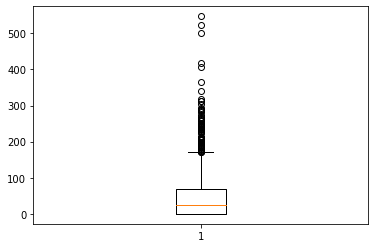

0      656
36      29
48      22
20      21
45      19
      ... 
141      1
137      1
135      1
134      1
547      1
Name: OpenPorchSF, Length: 202, dtype: int64

In [47]:
plt.boxplot(df.OpenPorchSF)
plt.show()
df.OpenPorchSF.value_counts()

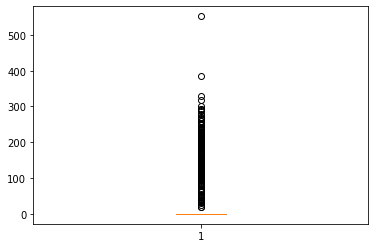

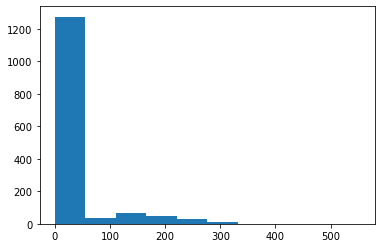

0      1252
112      15
96        6
120       5
192       5
       ... 
170       1
169       1
67        1
68        1
552       1
Name: EnclosedPorch, Length: 120, dtype: int64

In [48]:
plt.boxplot(df.EnclosedPorch)
plt.show()
plt.hist(df.EnclosedPorch)
plt.show()
df.EnclosedPorch.value_counts()

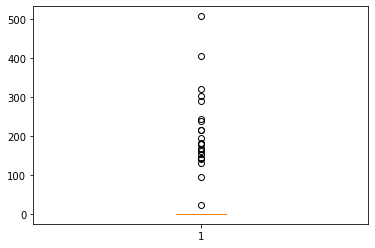

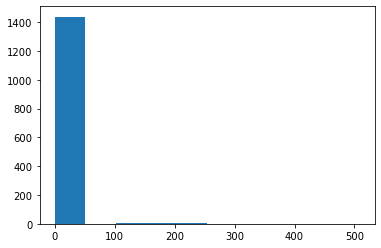

0      1436
168       3
216       2
144       2
180       2
407       1
320       1
304       1
290       1
245       1
238       1
182       1
196       1
23        1
162       1
153       1
140       1
130       1
96        1
508       1
Name: 3SsnPorch, dtype: int64

In [49]:
plt.boxplot(df["3SsnPorch"])
plt.show()
plt.hist(df["3SsnPorch"])
plt.show()
df["3SsnPorch"].value_counts()

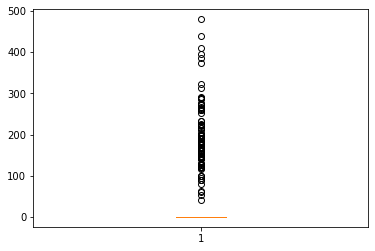

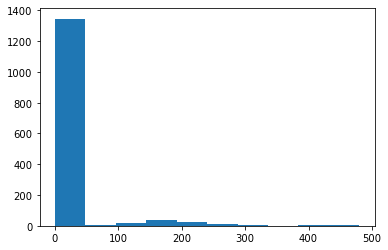

0      1344
192       6
120       5
224       5
180       4
       ... 
175       1
178       1
40        1
185       1
480       1
Name: ScreenPorch, Length: 76, dtype: int64

In [50]:
plt.boxplot(df.ScreenPorch)
plt.show()
plt.hist(df.ScreenPorch)
plt.show()
df.ScreenPorch.value_counts()

In [51]:
df_num.PoolArea.value_counts()

0      1453
480       1
512       1
519       1
555       1
576       1
648       1
738       1
Name: PoolArea, dtype: int64

In [52]:
print(df.PoolQC.isnull().sum())
print(df.PoolQC.value_counts())

1453
Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64


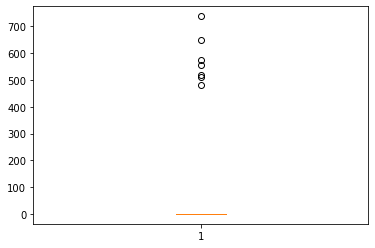

In [53]:
plt.boxplot(df.PoolArea)
plt.show()

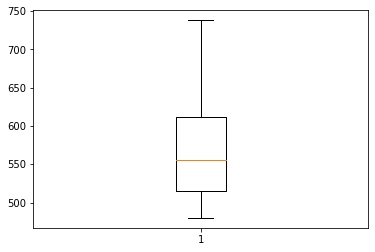

In [54]:
plt.boxplot(df[df.PoolArea>0].PoolArea)
plt.show()

In [55]:
df1=df[(df.PoolArea)>400]
df1.PoolArea

197     512
810     648
1170    576
1182    555
1298    480
1386    519
1423    738
Name: PoolArea, dtype: int64

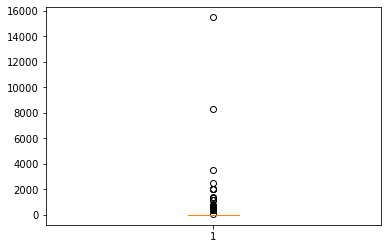

In [56]:
plt.boxplot(df.MiscVal)
plt.show()

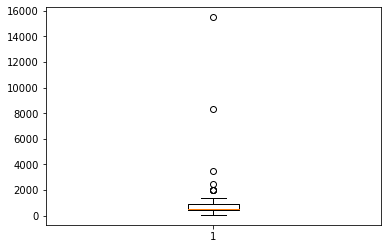

In [57]:
plt.boxplot(df[(df.MiscVal>0)].MiscVal)
plt.show()

In [58]:
df.MiscVal.value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
480         2
1200        2
2500        1
350         1
560         1
54          1
620         1
8300        1
800         1
1150        1
15500       1
1300        1
1400        1
3500        1
Name: MiscVal, dtype: int64

# Removing outliers

In [59]:
print(df.LotFrontage.median())
print(df.LotFrontage.mean())
print(df.LotFrontage.mode())
print(df.LotFrontage.isnull().sum())

69.0
70.04995836802665
0    60.0
dtype: float64
259


In [60]:
print(df.LotFrontage.value_counts())
print(df.LotFrontage.describe())
print(df.LotFrontage.head(10))

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
112.0      1
138.0      1
149.0      1
38.0       1
111.0      1
Name: LotFrontage, Length: 110, dtype: int64
count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64
0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7     NaN
8    51.0
9    50.0
Name: LotFrontage, dtype: float64


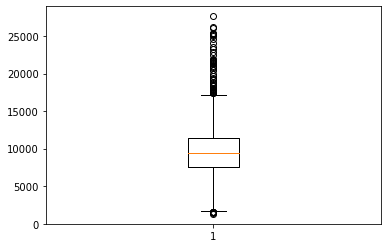

In [61]:
Q1=df.LotArea.quantile(0.1)
Q3=df.LotArea.quantile(0.9)
IQR=Q3-Q1
df=df[(df.LotArea >= Q1-1.5*IQR)&(df.LotArea <= Q3+1.5*IQR)]
df.LotArea.describe()
plt.boxplot(df.LotArea)
plt.show()

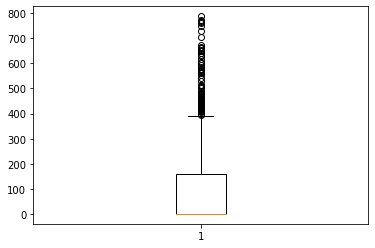

In [62]:
Q1=df.MasVnrArea.quantile(0.1)
Q3=df.MasVnrArea.quantile(0.9)
IQR=Q3-Q1
df=df[(df.MasVnrArea >= Q1-1.5*IQR)&(df.MasVnrArea <= Q3+1.5*IQR)]
df.MasVnrArea.describe()
plt.boxplot(df.MasVnrArea)
plt.show()

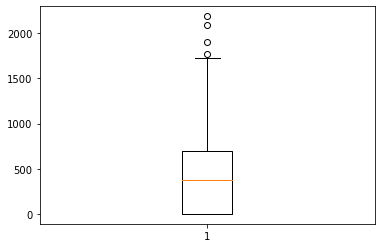

In [63]:
Q1=df.BsmtFinSF1.quantile(0.1)
Q3=df.BsmtFinSF1.quantile(0.9)
IQR=Q3-Q1
df=df[(df.BsmtFinSF1 >= Q1-1.5*IQR)&(df.BsmtFinSF1 <= Q3+1.5*IQR)]
df.BsmtFinSF1.describe()
plt.boxplot(df.BsmtFinSF1)
plt.show()

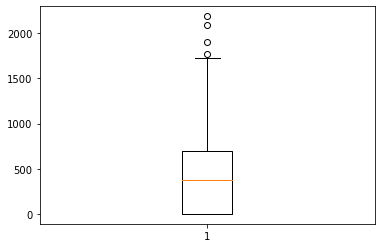

In [64]:
Q1=df.BsmtFinSF1.quantile(0.1)
Q3=df.BsmtFinSF1.quantile(0.9)
IQR=Q3-Q1
df=df[(df.BsmtFinSF1 >= Q1-1.5*IQR)&(df.BsmtFinSF1 <= Q3+1.5*IQR)]
df.BsmtFinSF1.describe()
plt.boxplot(df.BsmtFinSF1)
plt.show()

count    1413.000000
mean     1036.248408
std       395.992682
min         0.000000
25%       793.000000
50%       980.000000
75%      1271.000000
max      2633.000000
Name: TotalBsmtSF, dtype: float64


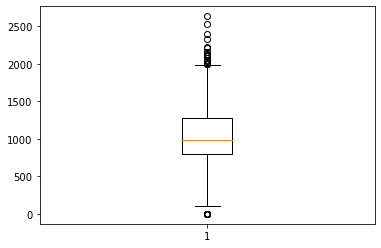

In [65]:
Q1=df.TotalBsmtSF.quantile(0.1)
Q3=df.TotalBsmtSF.quantile(0.9)
IQR=Q3-Q1
df=df[(df.TotalBsmtSF >= Q1-1.5*IQR)&(df.TotalBsmtSF <= Q3+1.5*IQR)]
print(df.TotalBsmtSF.describe())
plt.boxplot(df.TotalBsmtSF)
plt.show()

count    1412.000000
mean     1490.546742
std       484.746738
min       334.000000
25%      1122.750000
50%      1445.500000
75%      1753.000000
max      3608.000000
Name: GrLivArea, dtype: float64


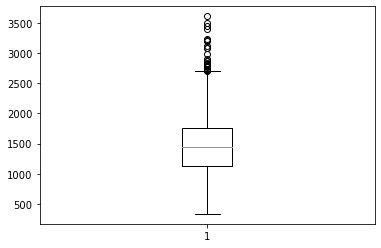

In [66]:
Q1=df.GrLivArea.quantile(0.1)
Q3=df.GrLivArea.quantile(0.9)
IQR=Q3-Q1
df=df[(df.GrLivArea >= Q1-1.5*IQR)&(df.GrLivArea <= Q3+1.5*IQR)]
print(df.GrLivArea.describe())
plt.boxplot(df.GrLivArea)
plt.show()

count      1409.000000
mean     175851.928318
std       69881.255356
min       34900.000000
25%      129000.000000
50%      160000.000000
75%      208900.000000
max      501837.000000
Name: SalePrice, dtype: float64


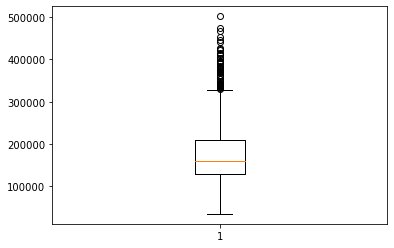

In [67]:
Q1=df.SalePrice.quantile(0.1)
Q3=df.SalePrice.quantile(0.9)
IQR=Q3-Q1
df=df[(df.SalePrice >= Q1-1.5*IQR)&(df.SalePrice <= Q3+1.5*IQR)]
print(df.SalePrice.describe())
plt.boxplot(df.SalePrice)
plt.show()

## Correlation

In [68]:
df.corr()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
MSSubClass,1.000000,-0.409319,-0.384758,0.052252,-0.060659,0.029888,0.046957,0.019455,-0.074070,-0.059797,...,-0.023853,0.003612,-0.007197,-0.044833,-0.023075,0.008083,-0.010898,-0.007532,-0.016658,-0.078140
LotFrontage,-0.409319,1.000000,0.652676,0.209595,-0.050167,0.110821,0.081569,0.167077,0.121087,0.041612,...,0.072056,0.116317,0.023615,0.079367,0.052491,0.078094,0.007985,0.035913,0.002879,0.350732
LotArea,-0.384758,0.652676,1.000000,0.179509,0.001980,0.044128,0.045497,0.107674,0.154419,0.071353,...,0.140170,0.135919,0.016638,0.083699,0.093706,0.102840,0.055930,0.018506,-0.031590,0.384925
OverallQual,0.052252,0.209595,0.179509,1.000000,-0.084758,0.566394,0.546671,0.397116,0.194945,-0.066331,...,0.234171,0.302829,-0.113626,0.035997,0.067462,0.020390,-0.029061,0.075540,-0.025654,0.808178
OverallCond,-0.060659,-0.050167,0.001980,-0.084758,1.000000,-0.373902,0.075839,-0.127978,-0.028332,0.038636,...,-0.003541,-0.025395,0.075273,0.024402,0.060495,0.007522,0.067286,-0.006261,0.042317,-0.068836
YearBuilt,0.029888,0.110821,0.044128,0.566394,-0.373902,1.000000,0.588303,0.321507,0.246218,-0.047051,...,0.236070,0.181475,-0.392266,0.033950,-0.052514,-0.013657,-0.032824,0.013632,-0.016389,0.552088
YearRemodAdd,0.046957,0.081569,0.045497,0.546671,0.075839,0.588303,1.000000,0.168766,0.120738,-0.067452,...,0.216620,0.222753,-0.193830,0.047602,-0.041446,-0.008940,-0.009015,0.020655,0.034227,0.540406
MasVnrArea,0.019455,0.167077,0.107674,0.397116,-0.127978,0.321507,0.168766,1.000000,0.226601,-0.069988,...,0.158006,0.132231,-0.107418,0.032487,0.058369,-0.015165,-0.030699,0.019278,0.004785,0.455454
BsmtFinSF1,-0.074070,0.121087,0.154419,0.194945,-0.028332,0.246218,0.120738,0.226601,1.000000,-0.060955,...,0.180015,0.064451,-0.107516,0.035161,0.070003,0.019081,0.005900,0.009008,0.025284,0.374695
BsmtFinSF2,-0.059797,0.041612,0.071353,-0.066331,0.038636,-0.047051,-0.067452,-0.069988,-0.060955,1.000000,...,0.074455,0.018684,0.042558,-0.030060,0.081595,0.055840,0.005537,-0.014140,0.019682,-0.026081


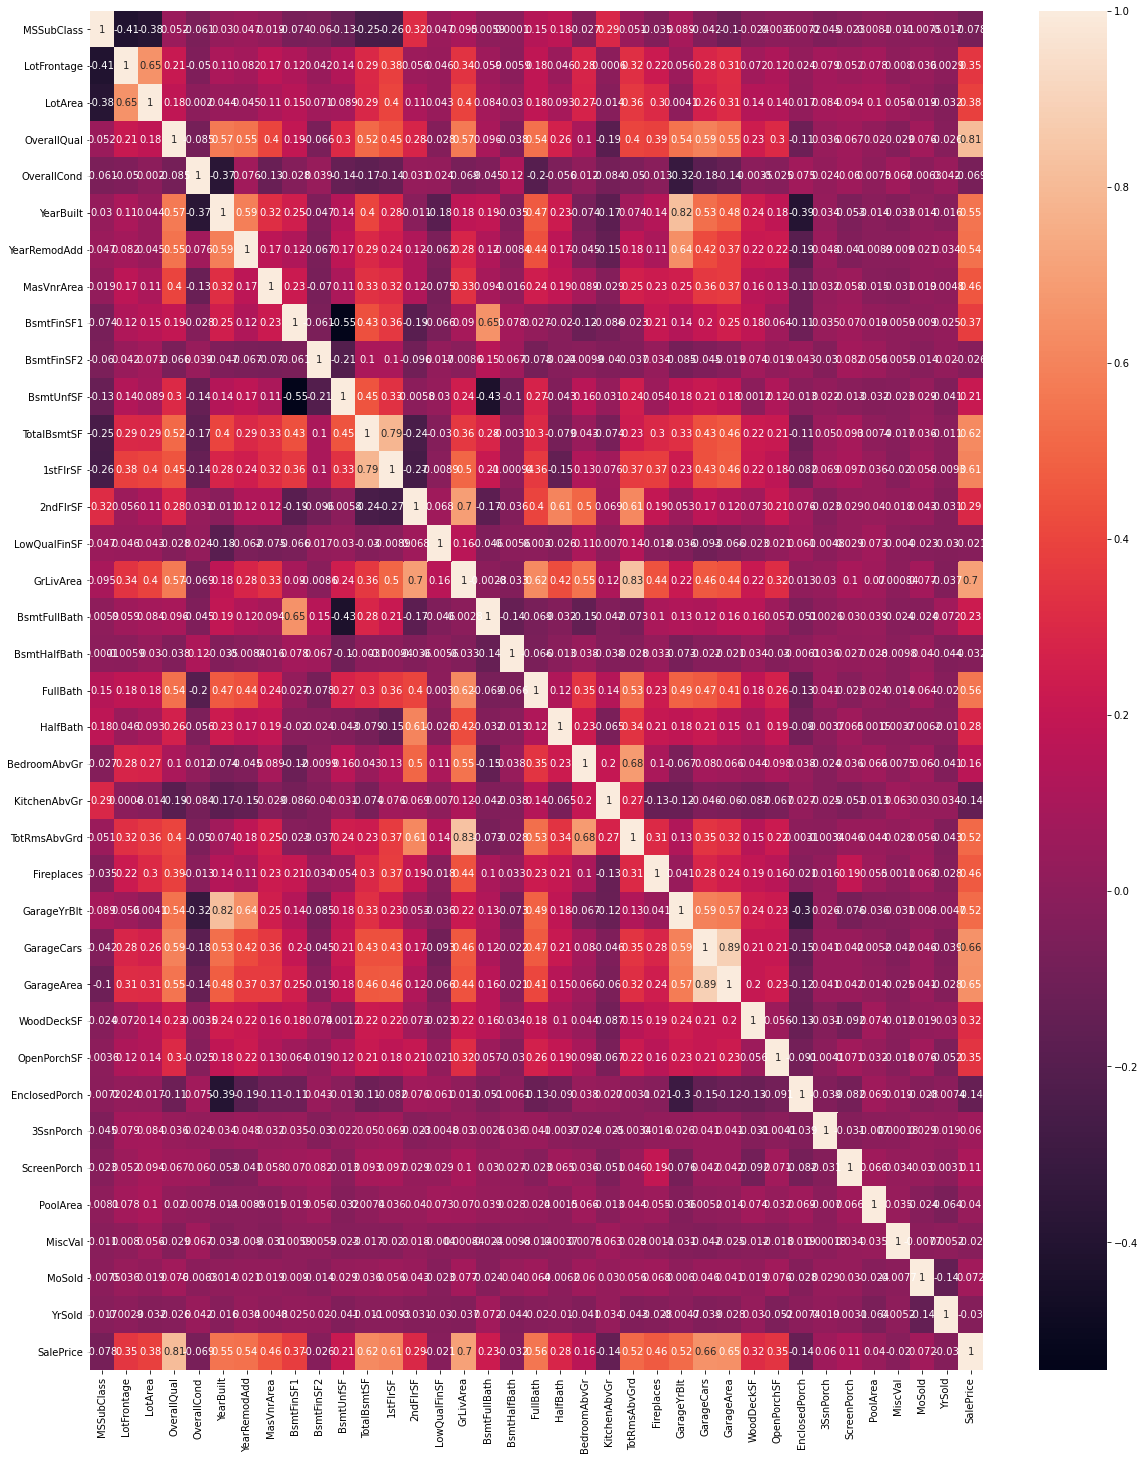

In [69]:
plt.figure(figsize=(20,25)) # visualsing correlation between variables
sns.heatmap(df.corr(),annot=True)
plt.show()

## Data Cleaning
### Treating null values

In [70]:
80-df.isna().any().sum() # Checking number of columns with null values

63

In [71]:
df.isnull().sum() #null values

MSSubClass         0
MSZoning           0
LotFrontage      246
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64

In [72]:
df_num.isnull().sum()

LotFrontage      259
LotArea            0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
SalePrice          0
dtype: int64

In [73]:
df_null=(df.isnull().sum()/len(df))*100
df_null=df_null.drop(df_null[df_null==0].index).sort_values(ascending=False)[:30]
null_data=pd.DataFrame({"Missing Ratio":df_null})
null_data

,Missing Ratio
PoolQC,99.645138
MiscFeature,96.309439
Alley,93.825408
Fence,80.198722
FireplaceQu,48.403123
LotFrontage,17.459191
GarageType,5.748758
GarageYrBlt,5.748758
GarageFinish,5.748758
GarageQual,5.748758


In [74]:
print(df.columns)

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [75]:
print(df.LotFrontage.mean())
print(df.LotFrontage.median())
print(df.LotFrontage.mode())

69.32674118658642
69.0
0    60.0
dtype: float64


In [76]:
df.LotFrontage=df.LotFrontage.fillna(df.LotFrontage.median()) #filling null values by median

In [77]:
df.LotFrontage.head(10)

0    65.0
1    80.0
2    68.0
3    60.0
4    84.0
5    85.0
6    75.0
7    69.0
8    51.0
9    50.0
Name: LotFrontage, dtype: float64

#### filling na values with not present as given in dictionary

In [78]:
df.PoolQC=df.PoolQC.fillna("NotPresent")

In [79]:
df.MiscFeature=df.MiscFeature.fillna("NotPresent")

In [80]:
df.Alley=df.Alley.fillna("NotPresent")

In [81]:
df.Fence=df.Fence.fillna("NotPresent")

In [82]:
df.FireplaceQu=df.FireplaceQu.fillna("NotPresent")

In [83]:
df.BsmtFinType2=df.BsmtFinType2.fillna("NotPresent")

In [84]:
df.BsmtFinType1=df.BsmtFinType1.fillna("NotPresent")

In [85]:
df.BsmtCond=df.BsmtCond.fillna("NotPresent")

In [86]:
df.BsmtExposure=df.BsmtExposure.fillna("NotPresent")

In [87]:
df.BsmtQual=df.BsmtQual.fillna("NotPresent")

In [88]:
df.MasVnrType=df.MasVnrType.fillna("NotPresent")

In [89]:
df.GarageQual=df.GarageQual.fillna("NotPresent")

In [90]:
df.GarageCond=df.GarageCond.fillna("NotPresent")

In [91]:
df.GarageType=df.GarageType.fillna("NotPresent")

In [92]:
df.GarageFinish=df.GarageFinish.fillna("NotPresent")

In [93]:
df.GarageType.value_counts()

Attchd        834
Detchd        382
NotPresent     81
BuiltIn        80
Basment        19
CarPort         9
2Types          4
Name: GarageType, dtype: int64

In [94]:
print(df.MasVnrType.value_counts())
print(df.MasVnrArea.value_counts())
print(df.Electrical.value_counts())

None       850
BrkFace    428
Stone      118
BrkCmn      13
Name: MasVnrType, dtype: int64
0.0      847
72.0       8
180.0      8
108.0      8
16.0       7
        ... 
632.0      1
481.0      1
375.0      1
342.0      1
415.0      1
Name: MasVnrArea, Length: 306, dtype: int64
SBrkr    1283
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64


#### Filling with zero for appropriate columns

In [95]:
df.BsmtFinSF2=df.BsmtFinSF2.fillna("0")

In [96]:
df.GarageYrBlt=df.GarageYrBlt.fillna("0")

In [97]:
df.BsmtFullBath=df.BsmtFullBath.fillna("0")

In [98]:
df.GarageArea=df.GarageArea.fillna("0")

In [99]:
df.BsmtFinSF1=df.BsmtFinSF1.fillna("0")

In [100]:
df.BsmtUnfSF=df.BsmtUnfSF.fillna("0")

In [101]:
df.MasVnrArea=df.MasVnrArea.fillna("0")

In [102]:
df.TotalBsmtSF=df.TotalBsmtSF.fillna("0")

In [103]:
df.GarageCars=df.GarageCars.fillna("0")

In [104]:
df.BsmtHalfBath=df.BsmtHalfBath.fillna("0")

In [105]:
df.BsmtHalfBath.value_counts()

0    1331
1      76
2       2
Name: BsmtHalfBath, dtype: int64

In [106]:
df.Electrical=df.Electrical.fillna(df.Electrical.mode()[0])

In [107]:
df.Electrical.value_counts()

SBrkr    1284
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [108]:
df.Electrical.isnull().sum()

0

#### Null value recheck to confirm no null values are present

In [109]:
df_null=(df.isnull().sum()/len(df))*100
df_null=df_null.drop(df_null[df_null==0].index).sort_values(ascending=False)[:30]
null_data=pd.DataFrame({"Missing Ratio":df_null})
null_data

,Missing Ratio


In [110]:
df.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 80, dtype: int64

# Haandling Non Linear data


 mu = 175851.93 and sigma=69856.45



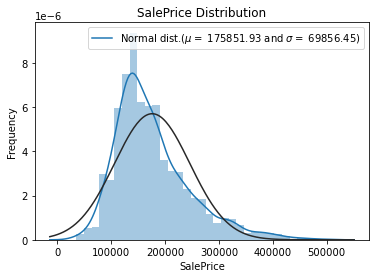

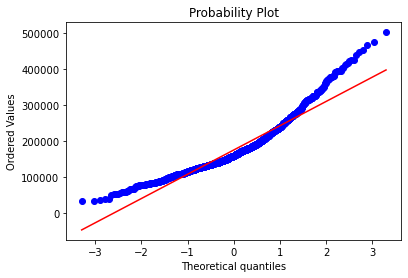

In [111]:
sns.distplot(df["SalePrice"], fit=norm)

# Getting fit params
(mu,sigma)= norm.fit(df["SalePrice"])
print("\n mu = {:.2f} and sigma={:.2f}\n".format(mu,sigma))

# dist plot
plt.legend(["Normal dist.($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu,sigma)],loc="best")
plt.title("SalePrice Distribution")
plt.ylabel("Frequency")

# QQ-plot
fig=plt.figure()
res=stats.probplot(df["SalePrice"],plot=plt)
plt.show()


 mu = 12.00 and sigma = 0.38



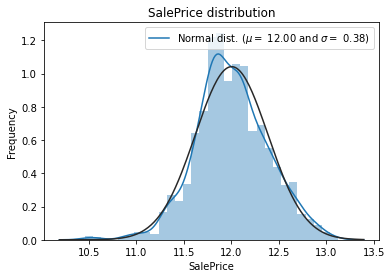

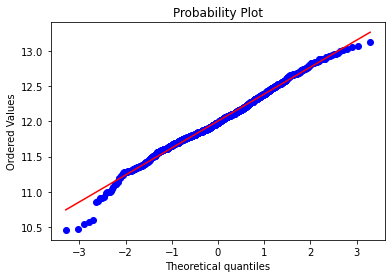

In [112]:
#Applying log(1+x) to saleprice column 
df.SalePrice=np.log1p(df.SalePrice)

# new dist plot
sns.distplot(df.SalePrice,fit=norm)

# Getting fit params
(mu,sigma)=norm.fit(df.SalePrice)
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu,sigma))

#dist plot
plt.legend(["Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f})".format(mu,sigma)],loc="best")
plt.title("SalePrice distribution")
plt.ylabel("Frequency")

# QQ-plot
fig=plt.figure()
res=stats.probplot(df.SalePrice,plot=plt)
plt.show()

In [113]:
df.MSSubClass=df.MSSubClass.astype("object")
df.OverallQual=df.OverallQual.astype("object")
df.OverallCond=df.OverallCond.astype("object")
df.YearBuilt=df.YearBuilt.astype("object")
df.YearRemodAdd=df.YearRemodAdd.astype("object")
df.BsmtFullBath=df.BsmtFullBath.astype("object")
df.BsmtHalfBath=df.BsmtHalfBath.astype("object")
df.FullBath=df.FullBath.astype("object")
df.HalfBath=df.HalfBath.astype("object")
df.BedroomAbvGr=df.BedroomAbvGr.astype("object")
df.KitchenAbvGr=df.KitchenAbvGr.astype("object")
df.TotRmsAbvGrd=df.TotRmsAbvGrd.astype("object")
df.Fireplaces=df.Fireplaces.astype("object")
df.GarageYrBlt=df.GarageYrBlt.astype("object")
df.GarageCars=df.GarageCars.astype("object")
df.MoSold=df.MoSold.astype("object")
df.YrSold=df.YrSold.astype("object")

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1409 non-null   object 
 1   MSZoning       1409 non-null   object 
 2   LotFrontage    1409 non-null   float64
 3   LotArea        1409 non-null   int64  
 4   Street         1409 non-null   object 
 5   Alley          1409 non-null   object 
 6   LotShape       1409 non-null   object 
 7   LandContour    1409 non-null   object 
 8   Utilities      1409 non-null   object 
 9   LotConfig      1409 non-null   object 
 10  LandSlope      1409 non-null   object 
 11  Neighborhood   1409 non-null   object 
 12  Condition1     1409 non-null   object 
 13  Condition2     1409 non-null   object 
 14  BldgType       1409 non-null   object 
 15  HouseStyle     1409 non-null   object 
 16  OverallQual    1409 non-null   object 
 17  OverallCond    1409 non-null   object 
 18  YearBuil

In [115]:
df_final=df

In [116]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

### Creating Dummy Variables

In [117]:
var_list1= ["Street"]

# def map function
def binary_map(x):
    return x.map({"Pave":1,"Grvl":0})

df_final[var_list1]=df_final[var_list1].apply(binary_map)

In [118]:
var_list2= ["CentralAir"]

# def map function
def binary_map(x):
    return x.map({"Y":1,"N":0})

df_final[var_list2]=df_final[var_list2].apply(binary_map)

In [119]:
var_list3= ["Utilities"]

# def map function
def binary_map(x):
    return x.map({"AllPub":1,"NoSeWa":0})

df_final[var_list3]=df_final[var_list3].apply(binary_map)

In [120]:
df.Utilities.value_counts()

1    1408
0       1
Name: Utilities, dtype: int64

In [121]:
#categorical variables
df_cat=df.select_dtypes(include="object")
df_cat.columns

Index(['MSSubClass', 'MSZoning', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'Electrical', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageQual', 'GarageCond',
       'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [122]:
df_dummy=pd.get_dummies(df_cat,drop_first=True)
df_dummy.head()

,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [123]:
df_final=df.drop(list(df_cat.columns),axis=1)

In [124]:
df_final.columns

Index(['LotFrontage', 'LotArea', 'Street', 'Utilities', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice'],
      dtype='object')

In [125]:
df_final=pd.concat([df_final,df_dummy],axis=1)
df_final.shape

(1409, 591)

In [126]:
df_final=df.drop(["GarageYrBlt","YearBuilt","YrSold","YearRemodAdd"],axis=1) #dropping few values based on correlation and other factors

In [127]:
X=df_final.drop("SalePrice",axis=1)
y=df_final.pop("SalePrice")

In [128]:
print(X.shape,y.shape)

(1409, 75) (1409,)


In [129]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [130]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape,y_test.shape)

(986, 75)
(986,)
(423, 75) (423,)


In [134]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1409 entries, 0 to 1459
Data columns (total 75 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1409 non-null   object 
 1   MSZoning       1409 non-null   object 
 2   LotFrontage    1409 non-null   float64
 3   LotArea        1409 non-null   int64  
 4   Street         1409 non-null   int64  
 5   Alley          1409 non-null   object 
 6   LotShape       1409 non-null   object 
 7   LandContour    1409 non-null   object 
 8   Utilities      1409 non-null   int64  
 9   LotConfig      1409 non-null   object 
 10  LandSlope      1409 non-null   object 
 11  Neighborhood   1409 non-null   object 
 12  Condition1     1409 non-null   object 
 13  Condition2     1409 non-null   object 
 14  BldgType       1409 non-null   object 
 15  HouseStyle     1409 non-null   object 
 16  OverallQual    1409 non-null   object 
 17  OverallCond    1409 non-null   object 
 18  RoofStyl

In [139]:
sum(df_final.isnull().sum())

0

# Ridge Regression

In [131]:
lm_ridge = Ridge()

parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}
lm_ridge_grd = GridSearchCV(estimator = lm_ridge, param_grid=parameters)

lm_ridge_grd.fit(X_train,y_train)

print("The best value of Alpha is: ",lm_ridge_grd.best_params_,lm_ridge_grd.best_score_)

ValueError: could not convert string to float: 'RL'

In [ ]:
lm_ridge_best_gcv = lm_ridge_grd.best_estimator_
lm_ridge_best_gcv

In [ ]:
lm_ridge_best_gcv.fit(X_train,y_train)


In [ ]:
y_pred_train_ridge_gcv = lm_ridge_best_gcv.predict(X_train)
y_pred_test_ridge_gcv =  lm_ridge_best_gcv.predict(X_test)


In [ ]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_ridge_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_ridge_gcv)))) 

In [ ]:
# ridge model parameters
model_parameters = list(lm_ridge_best_gcv.coef_)
model_parameters.insert(0, lm_ridge_best_gcv.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

In [ ]:
# Creating dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], axis = 0, ascending = False)
res.head(20)

In [ ]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

In [ ]:
## since there are few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

In [ ]:
Ridge_var = list(predRFE['Variable'])
print(Ridge_var)

# Lasso

In [133]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

NameError: name 'params' is not defined

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

In [ ]:
#lets find out the R-squared value of the lasso model
model_cv1 = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'r2', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv1.fit(X_train, y_train) 

In [ ]:
# cv results
cv_results1 = pd.DataFrame(model_cv1.cv_results_)
cv_results1

In [ ]:
# plotting cv results
plt.figure(figsize=(16,4))

plt.plot(cv_results1["param_alpha"], cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"], cv_results1["mean_train_score"])
plt.xlabel('number of features')
plt.ylabel('r-squared')
plt.title("Optimal Number of Features")
plt.legend(['test score', 'train score'], loc='upper right')

In [ ]:
#checking the value of optimum number of parameters
print(model_cv.best_params_)
print(model_cv.best_score_)

In [ ]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.figure(figsize=(16,5))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()